Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Liabraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


DATA Preprocessing

In [ ]:
#training image preprocessing
training_set=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Recognition/train',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=None,
    crop_to_aspect_ratio=None)

Found 3115 files belonging to 36 classes.


##Validation Image Preprocessing

In [ ]:
#training image preprocessing
validation_set=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Recognition/validation',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=None,
    crop_to_aspect_ratio=None)

Found 351 files belonging to 36 classes.


##Buid Model

In [ ]:
 cnn=tf.keras.models.Sequential()

####Building Convulation Layers

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu",input_shape=(64,64,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu",input_shape=(64,64,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
#cnn.add(tf.keras.layers.Dropout(0.5))##to avoid overfitting

In [ ]:

cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128,activation="relu"))

In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

###Compiling and Training Phase

In [ ]:
cnn.compile(optimizer="rmsprop",loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=28)

Epoch 1/28
98/98 [==============================] - 564s 5s/step - loss: 10.0019 - accuracy: 0.0401 - val_loss: 5.6960 - val_accuracy: 0.0427
Epoch 2/28
98/98 [==============================] - 113s 1s/step - loss: 4.0140 - accuracy: 0.0803 - val_loss: 3.6070 - val_accuracy: 0.1311
Epoch 3/28
98/98 [==============================] - 111s 1s/step - loss: 3.7989 - accuracy: 0.1743 - val_loss: 2.8110 - val_accuracy: 0.3134
Epoch 4/28
98/98 [==============================] - 109s 1s/step - loss: 3.0525 - accuracy: 0.3091 - val_loss: 2.1556 - val_accuracy: 0.5214
Epoch 5/28
98/98 [==============================] - 112s 1s/step - loss: 2.8859 - accuracy: 0.4286 - val_loss: 2.0070 - val_accuracy: 0.6410
Epoch 6/28
98/98 [==============================] - 120s 1s/step - loss: 2.1670 - accuracy: 0.5454 - val_loss: 1.6324 - val_accuracy: 0.6667
Epoch 7/28
98/98 [==============================] - 113s 1s/step - loss: 1.6719 - accuracy: 0.6257 - val_loss: 1.6521 - val_accuracy: 0.7265
Epoch 8/28
9

In [ ]:
#Saving Model
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###Saving Model and calling it


In [ ]:
import json
with open('training_hist.json','w')as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


###Calculate Accuracy of Model Acheived on Validation Set

In [ ]:
print("Validation Set accuracy: {}%".format(training_history.history['val_accuracy'][-1]*100))

Validation Set accuracy: 81.76637887954712%


##Accuracy Vidualization


###Training Visualization

In [ ]:
epochs=[i for i in range(1,29)]

Text(0.5, 1.0, 'Training Accuracy of the Model')

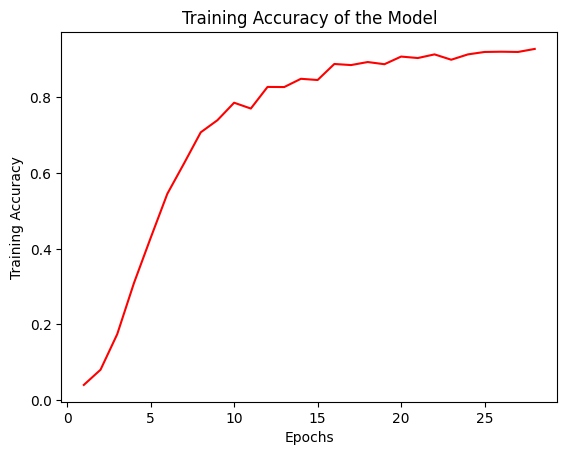

In [ ]:
plt.plot(epochs,training_history.history['accuracy'],color='red',)
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy of the Model")


Text(0.5, 1.0, 'Validation Accuracy of The Model')

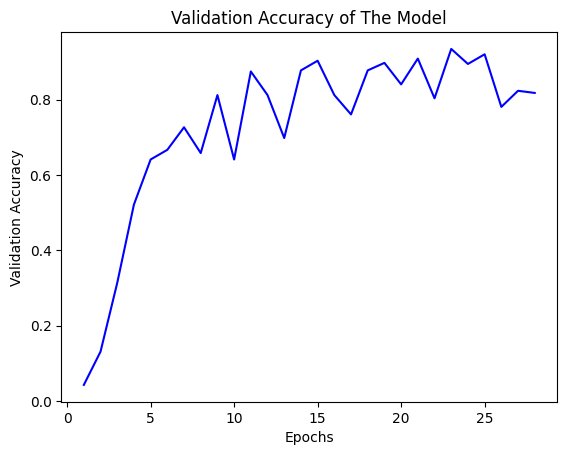

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color="blue")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy of The Model")

Text(0.5, 1.0, 'Validation Accuracy of The Model')

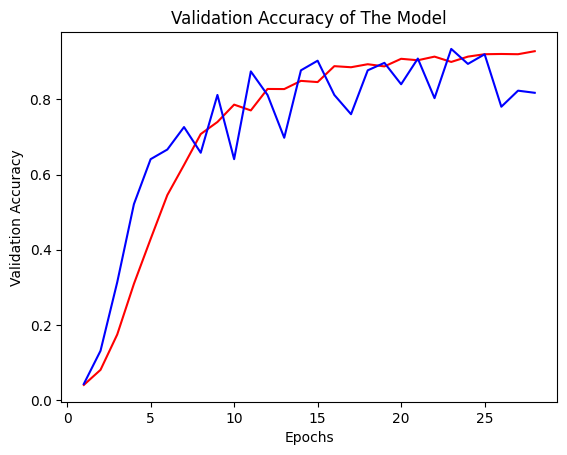

In [ ]:
plt.plot(epochs,training_history.history['accuracy'],color='red',)
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy of the Model")

plt.plot(epochs,training_history.history['val_accuracy'],color="blue")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy of The Model")

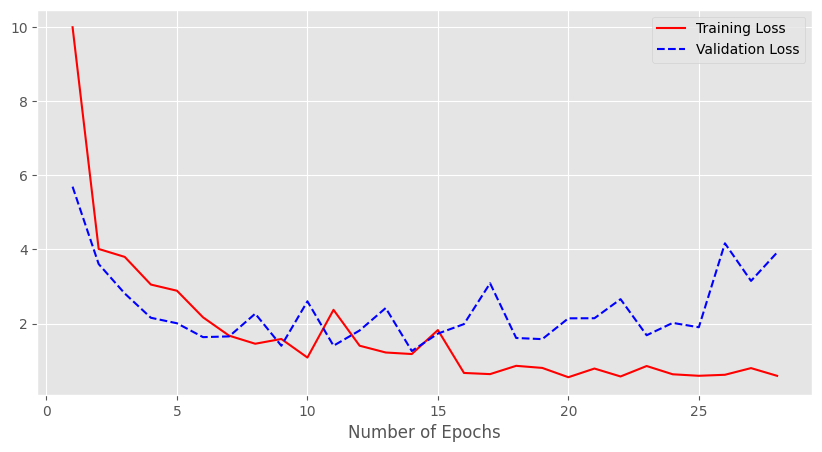

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(epochs,training_history.history['loss'], c='red', label='Training Loss')
plt.plot(epochs,training_history.history['val_loss'], c='blue', linestyle='--', label='Validation Loss')

plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

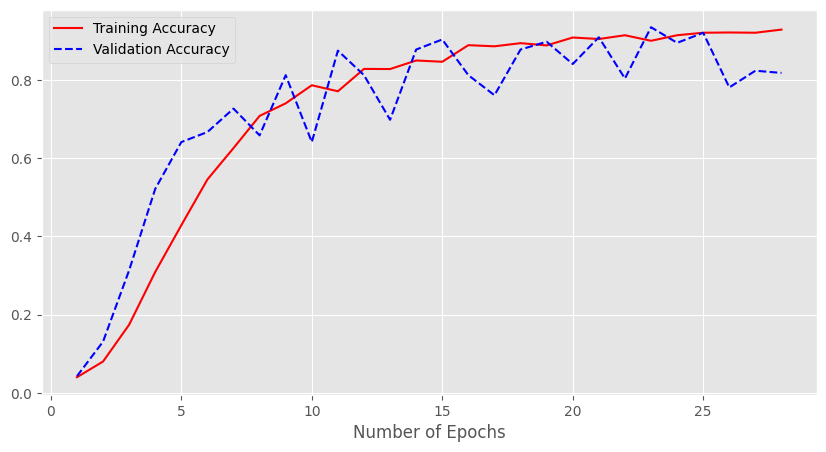

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(epochs,training_history.history['accuracy'], c='red', label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()